# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In this medical situation, we can view each person reciving the treatment as either having a successful outcome or a failed outcome. The total number of persons with a successful treatment will thus always be a positive integer. Each event/trail are binomial since we only define success of failure. 

Binomial distribution is therefor appropriate for the likelihood function. The observed variables for the likelihood function is the number of trails which is 141, and the number of success/failure which is 107 and 34. The unovserved parameter is the bias which indicates the probability of a random person that recivies the treatment responds positively to it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts

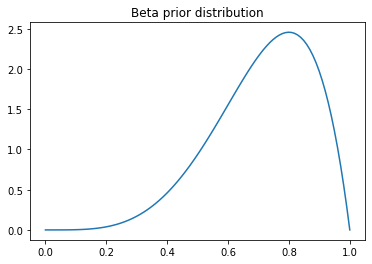

In [2]:
#beta prior

#I decided these parameters as I believe that it's very unlikely that the treatment works for no one or everyone.
#However, i believe it should work for more than it doesn't work for
alpha = 5
beta = 2

#the beta dstribution
beta_dist = sts.beta(a = alpha, b = beta)

#Lambda ranging the support
x = np.linspace(0,1,100)


#plot
plt.plot(x, beta_dist.pdf(x))
plt.title("Beta prior distribution")
plt.show()

36


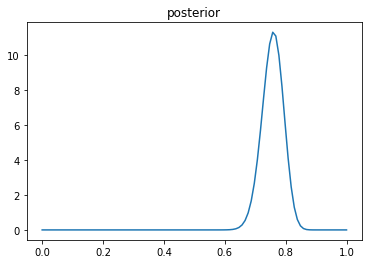

In [3]:
sum_N = 141 #total number of trails
sum_Xi = 107 #all the successes

#the new hyperparameters
alpha_post = alpha+sum_Xi
beta_post = beta + sum_N - sum_Xi

print(beta_post)

beta_post = sts.beta(a = alpha_post, b = beta_post)

plt.plot(x, beta_post.pdf(x))
plt.title("posterior")
plt.show()


From our posterior, we see that most of the mass is centered around 0.75 and we believe that the probability of a successful treatment is around 0.75

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* $n \in \mathbb{N}_0$ – the number of trials
* $\alpha, \beta \in \mathbb{R}^+$ – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

$$p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}$$

where $B$ is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [4]:
n = 100
k = list(range(1,n+1))

In [5]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import beta as beta_function, comb
    return comb(n, k) * beta_function(k + alpha, n - k + beta) / beta_function(alpha, beta)

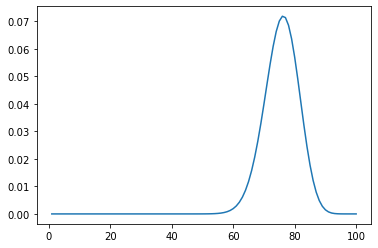

In [7]:
#For some reason i don't understand, I couldn't input the beta_post. however, the beta_post value is 36
plt.plot(k, [beta_binomial_pmf(k_i, n, alpha = alpha_post, beta = 36) for k_i in k])
plt.show()

In [11]:
#Since we are dealing with discrete values, we can just sum up all the values for k uo to 66
sum([beta_binomial_pmf(k_i, n, alpha = alpha_post, beta = 36) for k_i in k[0:2*round(len(k)/3)]])

#it's around 5% chance that two thirds of the trails are successful for a 100 person study

0.05445395710539814

In [14]:
sum([beta_binomial_pmf(k_i, n, alpha = alpha_post, beta = 36) for k_i in k[0:3*round(len(k)/4)]])

#it's around 5% chance that three fourth of the trails are successful for a 100 person study

0.47292420494060516

In [ ]:
For 